In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import time
import gym
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models

from baselines.ppo2 import ppo2
from baselines.common.vec_env.dummy_vec_env import DummyVecEnv

from baselines import bench
from baselines import logger
from baselines.common.tf_util import make_session

In [237]:
path = 'C:\\Users\\ZhaoY\\Downloads\\hoang2019\\replication_data\\qt.csv'

In [238]:
qt_data = pd.read_csv(path)

In [239]:
qt_data.head()

,Unnamed: 0,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,1,000025ca1ecabe363934bdc8794b01ffb926af66,1351855558,0,0,2,0,1,1,1,...,82.0,130.0,0.013219,0.018286,0.028861,2,False,False,0.0,2
1,2,0001dcd3a2d67fe8832562746a293754a9a8d7a0,1339594674,0,0,53,42,8,4,1,...,NaN,NaN,0.000000,0.000000,0.000000,95,False,False,0.0,1
2,3,0003fa206c5abac81c85bcd662a9555e41c3bfbe,1373999392,0,0,28,4,2,1,1,...,NaN,NaN,0.000000,0.000000,0.000000,32,False,False,0.0,4
3,5,0006255d847ebff402dc771092c115ae714d8e10,1363894865,0,0,12,10,4,1,1,...,1496.0,1673.0,0.029888,0.114432,0.127962,22,False,False,0.0,3
4,6,0008428f9088d1d6623dec5706d49cbf65692e28,1320409350,0,0,53,39,6,4,2,...,246.0,265.0,0.011343,0.087558,0.094293,92,False,False,0.0,0


In [240]:
qt_data = qt_data.drop(['Unnamed: 0'],axis=1)

In [241]:
qt_data.head()

,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,000025ca1ecabe363934bdc8794b01ffb926af66,1351855558,0,0,2,0,1,1,1,0.000000,...,82.0,130.0,0.013219,0.018286,0.028861,2,False,False,0.0,2
1,0001dcd3a2d67fe8832562746a293754a9a8d7a0,1339594674,0,0,53,42,8,4,1,0.846452,...,NaN,NaN,0.000000,0.000000,0.000000,95,False,False,0.0,1
2,0003fa206c5abac81c85bcd662a9555e41c3bfbe,1373999392,0,0,28,4,2,1,1,0.974489,...,NaN,NaN,0.000000,0.000000,0.000000,32,False,False,0.0,4
3,0006255d847ebff402dc771092c115ae714d8e10,1363894865,0,0,12,10,4,1,1,0.665790,...,1496.0,1673.0,0.029888,0.114432,0.127962,22,False,False,0.0,3
4,0008428f9088d1d6623dec5706d49cbf65692e28,1320409350,0,0,53,39,6,4,2,0.731369,...,246.0,265.0,0.011343,0.087558,0.094293,92,False,False,0.0,0


In [242]:
qt_data.keys()

Index(['commit_id', 'author_date', 'bugcount', 'fixcount', 'la', 'ld', 'nf',
       'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt', 'self', 'ndev',
       'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp', 'orexp',
       'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'churn', 'buggy',
       'fix', 'bugdens', 'strata'],
      dtype='object')

array([[<AxesSubplot:title={'center':'author_date'}>,
        <AxesSubplot:title={'center':'bugcount'}>,
        <AxesSubplot:title={'center':'fixcount'}>,
        <AxesSubplot:title={'center':'la'}>,
        <AxesSubplot:title={'center':'ld'}>,
        <AxesSubplot:title={'center':'nf'}>],
       [<AxesSubplot:title={'center':'nd'}>,
        <AxesSubplot:title={'center':'ns'}>,
        <AxesSubplot:title={'center':'ent'}>,
        <AxesSubplot:title={'center':'nrev'}>,
        <AxesSubplot:title={'center':'rtime'}>,
        <AxesSubplot:title={'center':'hcmt'}>],
       [<AxesSubplot:title={'center':'ndev'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'nuc'}>,
        <AxesSubplot:title={'center':'app'}>,
        <AxesSubplot:title={'center':'aexp'}>,
        <AxesSubplot:title={'center':'rexp'}>],
       [<AxesSubplot:title={'center':'oexp'}>,
        <AxesSubplot:title={'center':'arexp'}>,
        <AxesSubplot:title={'center':'rrexp'}>,
      

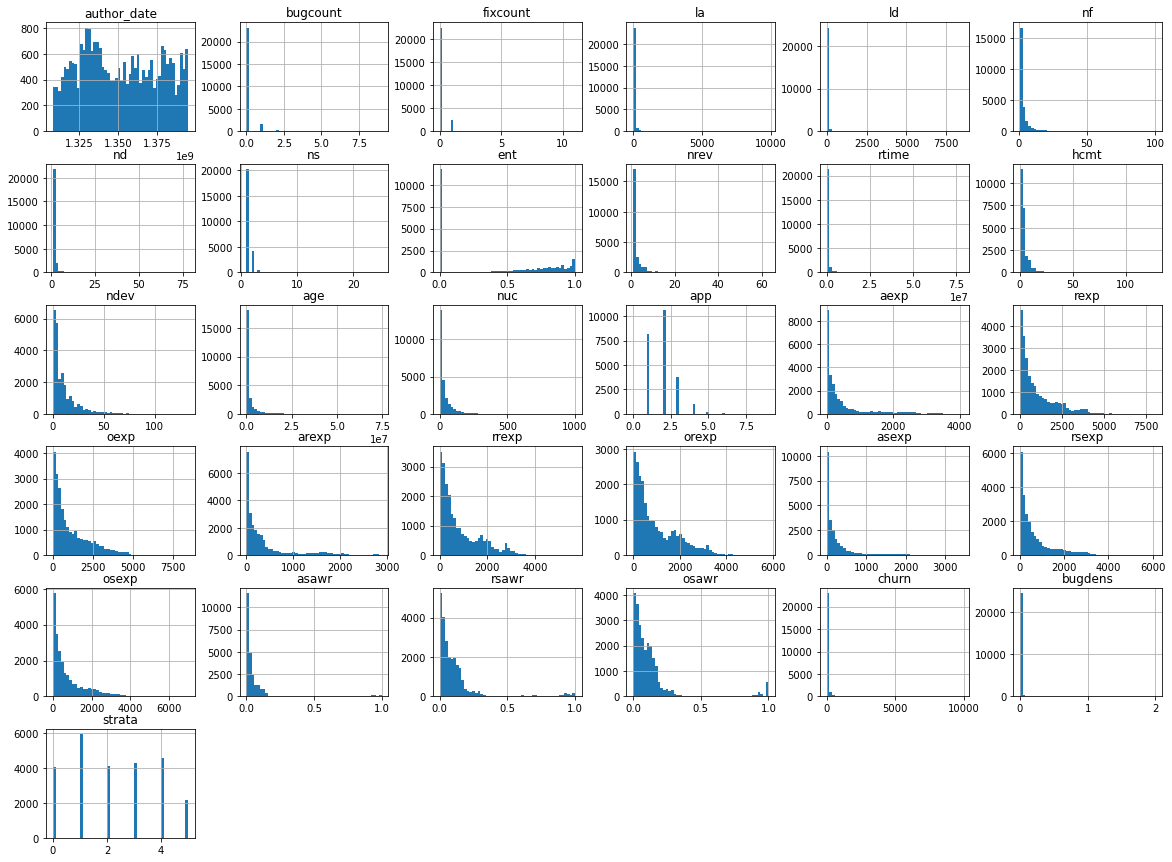

In [130]:
qt_data.hist(bins=50, figsize=(20,15))

In [243]:
qt_data.describe()

,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,nrev,...,orexp,asexp,rsexp,osexp,asawr,rsawr,osawr,churn,bugdens,strata
count,2.515000e+04,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000,23821.000000,...,23821.000000,25150.000000,23821.000000,23821.000000,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000,25150.000000
mean,1.351519e+09,0.105964,0.107237,57.917495,32.199006,3.558529,1.776421,1.256461,0.394805,2.462701,...,987.685572,307.993678,687.298476,792.446665,0.071693,0.118138,0.132824,90.116501,0.006217,2.238807
std,2.468792e+07,0.424816,0.335204,263.018753,188.993729,6.409376,2.477621,0.751417,0.403258,2.851827,...,929.482954,515.873597,820.543981,907.175171,0.168227,0.181780,0.199751,375.294513,0.053388,1.581582
min,1.308350e+09,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.330488e+09,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,254.000000,23.000000,119.000000,145.000000,0.006054,0.024422,0.032029,4.000000,0.000000,1.000000
50%,1.350308e+09,0.000000,0.000000,9.000000,3.000000,2.000000,1.000000,1.000000,0.322757,2.000000,...,634.000000,107.000000,359.000000,427.000000,0.022478,0.064473,0.077370,15.000000,0.000000,2.000000
75%,1.373273e+09,0.000000,0.000000,33.000000,13.000000,3.000000,2.000000,1.000000,0.811278,3.000000,...,1611.000000,322.000000,921.000000,1128.000000,0.057965,0.130720,0.141656,53.000000,0.000000,4.000000
max,1.395090e+09,9.000000,11.000000,9840.000000,8468.000000,100.000000,78.000000,25.000000,1.000000,63.000000,...,5810.000000,3419.000000,6122.000000,6972.000000,1.000000,1.000000,1.000000,9840.000000,2.000000,5.000000


In [132]:
for col in qt_data.columns:
    if qt_data[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(qt_data[col].value_counts())


Column Name: commit_id
fdd843d5a76f2bba5c4ebdd5813c97f5105c5765    1
416786d0f7fee72e235814c98eb2d887b6098ae3    1
684ed0dc14de1bfba249a322b14e16c586740626    1
7f20428c91bad817b2d350536756dd55a8d2103b    1
8fb8011e6ac6352cf60cdd59d840779f0d9c52a6    1
                                           ..
4d21c8b2b68cb575fb901965df349559c9147ed7    1
f6bd10b8ff5aacc6d214d8dd5be570a5301f9433    1
c45f9c7761a9016ff20c8c427cb5c84aba56bc57    1
b86be10882236d269817c42daa1bc3fa49fe78af    1
45d8bf327eee744570933211f611cf4410ae7e29    1
Name: commit_id, Length: 25150, dtype: int64

Column Name: self
False    22604
True      1217
Name: self, dtype: int64


In [133]:
qt_data['buggy']

0        False
1        False
2        False
3        False
4        False
         ...  
25145    False
25146    False
25147    False
25148    False
25149    False
Name: buggy, Length: 25150, dtype: bool

In [134]:
qt_data['buggy'].describe()

count     25150
unique        2
top       False
freq      23148
Name: buggy, dtype: object

In [135]:
qt_data['strata'].value_counts()

1    5934
4    4568
3    4298
2    4128
0    4032
5    2190
Name: strata, dtype: int64

In [136]:
#qt_data = qt_data.drop(['commit_id'],axis=1)
qt_data = qt_data.drop(['author_date'],axis=1)

In [137]:
qt_data.head()

,commit_id,bugcount,fixcount,la,ld,nf,nd,ns,ent,revd,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,000025ca1ecabe363934bdc8794b01ffb926af66,0,0,2,0,1,1,1,0.000000,True,...,82.0,130.0,0.013219,0.018286,0.028861,2,False,False,0.0,2
1,0001dcd3a2d67fe8832562746a293754a9a8d7a0,0,0,53,42,8,4,1,0.846452,False,...,NaN,NaN,0.000000,0.000000,0.000000,95,False,False,0.0,1
2,0003fa206c5abac81c85bcd662a9555e41c3bfbe,0,0,28,4,2,1,1,0.974489,False,...,NaN,NaN,0.000000,0.000000,0.000000,32,False,False,0.0,4
3,0006255d847ebff402dc771092c115ae714d8e10,0,0,12,10,4,1,1,0.665790,True,...,1496.0,1673.0,0.029888,0.114432,0.127962,22,False,False,0.0,3
4,0008428f9088d1d6623dec5706d49cbf65692e28,0,0,53,39,6,4,2,0.731369,True,...,246.0,265.0,0.011343,0.087558,0.094293,92,False,False,0.0,0


In [138]:
print(len(qt_data))

25150


In [139]:
qt_data.shape[0]

25150

In [140]:
qt_data.shape[1]

35

In [141]:
qt_data.corr()['buggy'].sort_values(ascending=False)

buggy       1.000000
bugcount    0.848187
bugdens     0.396003
nrev        0.167718
nf          0.153694
churn       0.135660
la          0.127961
hcmt        0.099931
ent         0.093512
ld          0.091307
nuc         0.090626
nd          0.089209
ndev        0.074439
revd        0.056988
ns          0.045661
fix         0.042096
fixcount    0.040455
app         0.023379
rtime       0.022183
asexp      -0.006231
rsexp      -0.015608
osexp      -0.023407
arexp      -0.027076
aexp       -0.028394
rsawr      -0.030639
asawr      -0.032784
osawr      -0.035724
rrexp      -0.039889
rexp       -0.041225
orexp      -0.051486
oexp       -0.052349
age        -0.060497
strata     -0.067255
Name: buggy, dtype: float64

In [142]:
qt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25150 entries, 0 to 25149
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   commit_id  25150 non-null  object 
 1   bugcount   25150 non-null  int64  
 2   fixcount   25150 non-null  int64  
 3   la         25150 non-null  int64  
 4   ld         25150 non-null  int64  
 5   nf         25150 non-null  int64  
 6   nd         25150 non-null  int64  
 7   ns         25150 non-null  int64  
 8   ent        25150 non-null  float64
 9   revd       25150 non-null  bool   
 10  nrev       23821 non-null  float64
 11  rtime      23821 non-null  float64
 12  hcmt       23821 non-null  float64
 13  self       23821 non-null  object 
 14  ndev       25150 non-null  int64  
 15  age        25150 non-null  float64
 16  nuc        25150 non-null  int64  
 17  app        23821 non-null  float64
 18  aexp       25150 non-null  int64  
 19  rexp       23821 non-null  float64
 20  oexp  

In [143]:
qt_data['self'].describe()

count     23821
unique        2
top       False
freq      22604
Name: self, dtype: object

In [144]:
qt_data = qt_data.drop(['self'],axis=1)

In [145]:
qt_data = qt_data.drop(['bugcount'],axis=1)

In [146]:
qt_data['revd'] = qt_data['revd'].astype(int)

In [149]:
qt_data['fix'] = qt_data['fix'].astype(int)
qt_data['buggy'] = qt_data['buggy'].astype(int)

array([[<AxesSubplot:xlabel='buggy', ylabel='buggy'>,
        <AxesSubplot:xlabel='nrev', ylabel='buggy'>,
        <AxesSubplot:xlabel='fixcount', ylabel='buggy'>,
        <AxesSubplot:xlabel='bugdens', ylabel='buggy'>,
        <AxesSubplot:xlabel='nf', ylabel='buggy'>,
        <AxesSubplot:xlabel='la', ylabel='buggy'>,
        <AxesSubplot:xlabel='ld', ylabel='buggy'>,
        <AxesSubplot:xlabel='strata', ylabel='buggy'>],
       [<AxesSubplot:xlabel='buggy', ylabel='nrev'>,
        <AxesSubplot:xlabel='nrev', ylabel='nrev'>,
        <AxesSubplot:xlabel='fixcount', ylabel='nrev'>,
        <AxesSubplot:xlabel='bugdens', ylabel='nrev'>,
        <AxesSubplot:xlabel='nf', ylabel='nrev'>,
        <AxesSubplot:xlabel='la', ylabel='nrev'>,
        <AxesSubplot:xlabel='ld', ylabel='nrev'>,
        <AxesSubplot:xlabel='strata', ylabel='nrev'>],
       [<AxesSubplot:xlabel='buggy', ylabel='fixcount'>,
        <AxesSubplot:xlabel='nrev', ylabel='fixcount'>,
        <AxesSubplot:xlabel='fixcount

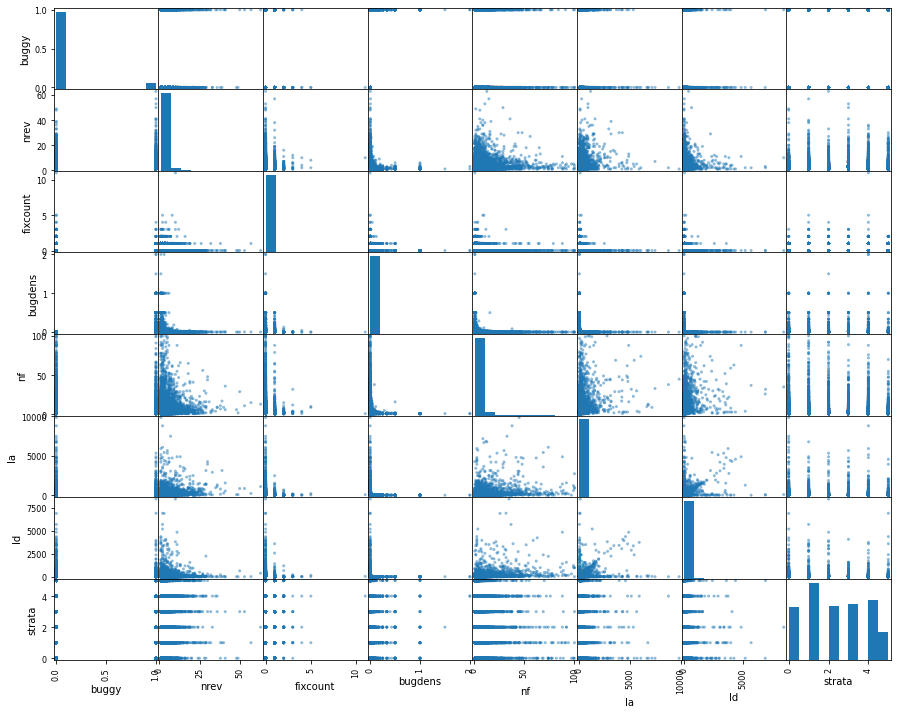

In [150]:
from pandas.plotting import scatter_matrix


attributes = ["buggy", "nrev", "fixcount", "bugdens", "nf", "la","ld", "strata"]

scatter_matrix(qt_data[attributes], figsize=(15, 12))

In [151]:
qt_data = qt_data.drop(['commit_id'],axis=1)

In [152]:
qt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25150 entries, 0 to 25149
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fixcount  25150 non-null  int64  
 1   la        25150 non-null  int64  
 2   ld        25150 non-null  int64  
 3   nf        25150 non-null  int64  
 4   nd        25150 non-null  int64  
 5   ns        25150 non-null  int64  
 6   ent       25150 non-null  float64
 7   revd      25150 non-null  int32  
 8   nrev      23821 non-null  float64
 9   rtime     23821 non-null  float64
 10  hcmt      23821 non-null  float64
 11  ndev      25150 non-null  int64  
 12  age       25150 non-null  float64
 13  nuc       25150 non-null  int64  
 14  app       23821 non-null  float64
 15  aexp      25150 non-null  int64  
 16  rexp      23821 non-null  float64
 17  oexp      23821 non-null  float64
 18  arexp     25150 non-null  int64  
 19  rrexp     23821 non-null  float64
 20  orexp     23821 non-null  fl

In [153]:
qt_data['bugdens'].value_counts()

0.000000    23148
0.500000       56
0.250000       44
0.333333       43
0.166667       40
            ...  
0.004785        1
0.001738        1
0.000474        1
0.103448        1
0.003236        1
Name: bugdens, Length: 697, dtype: int64

In [154]:
print((qt_data["buggy"]==True).value_counts())

False    23148
True      2002
Name: buggy, dtype: int64


In [155]:
qt_data.head(2)

,fixcount,la,ld,nf,nd,ns,ent,revd,nrev,rtime,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,0,2,0,1,1,1,0.000000,1,3.0,18903.0,...,82.0,130.0,0.013219,0.018286,0.028861,2,0,0,0.0,2
1,0,53,42,8,4,1,0.846452,0,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,95,0,0,0.0,1


In [156]:
qt_data.keys()

Index(['fixcount', 'la', 'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev',
       'rtime', 'hcmt', 'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp',
       'arexp', 'rrexp', 'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr',
       'osawr', 'churn', 'buggy', 'fix', 'bugdens', 'strata'],
      dtype='object')

In [158]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25150 entries, 0 to 25149
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author_date  25150 non-null  int64  
 1   fixcount     25150 non-null  int64  
 2   la           25150 non-null  int64  
 3   ld           25150 non-null  int64  
 4   nf           25150 non-null  int64  
 5   nd           25150 non-null  int64  
 6   ns           25150 non-null  int64  
 7   ent          25150 non-null  float64
 8   revd         25150 non-null  int32  
 9   nrev         23821 non-null  float64
 10  rtime        23821 non-null  float64
 11  hcmt         23821 non-null  float64
 12  ndev         25150 non-null  int64  
 13  age          25150 non-null  float64
 14  nuc          25150 non-null  int64  
 15  app          23821 non-null  float64
 16  aexp         25150 non-null  int64  
 17  rexp         23821 non-null  float64
 18  oexp         23821 non-null  float64
 19  arex

In [159]:
df_buggy = qt_data.loc[qt_data["buggy"]==1].dropna()
df_buggy = df_buggy.sample(frac=1).reset_index(drop=True)   # shuffle

df_buggy_test = df_buggy.sample(frac=0.2)
df_buggy_train = df_buggy[~df_buggy.isin(df_buggy_test)].dropna()

print(len(df_buggy_test))
print(len(df_buggy_train))

397
1586


In [160]:
df_clean = qt_data.loc[qt_data["buggy"]==0].dropna()
df_clean = df_clean.sample(frac=1).reset_index(drop=True)

df_clean_train = df_clean.sample(n=1586).dropna()
print(len(df_clean_train))
print(len(df_buggy_train))

df_clean_test = df_clean[~df_clean.isin(df_clean_train)].dropna().sample(n=278)
print(len(df_clean_test))

1586
1586
278


In [161]:
df_test = pd.concat([df_clean_test, df_buggy_test], axis=0)
df_test = df_test.sample(frac=1).reset_index(drop=True)

df_train = pd.concat([df_clean_train, df_buggy_train], axis=0)
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [162]:
df_test.head()

,fixcount,la,ld,nf,nd,ns,ent,revd,nrev,rtime,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,0.0,41.0,3.0,6.0,2.0,1.0,0.778908,1.0,3.0,9657.0,...,241.0,379.0,0.014963,0.018570,0.029159,44.0,1.0,0.0,0.022727,3.0
1,0.0,7.0,5.0,3.0,2.0,1.0,1.000000,1.0,1.0,417024.0,...,289.0,302.0,0.003528,0.035284,0.036866,12.0,0.0,0.0,0.000000,2.0
2,0.0,49.0,39.0,4.0,1.0,1.0,0.399142,1.0,2.0,7295.0,...,428.0,428.0,0.019243,0.091725,0.091725,88.0,0.0,0.0,0.000000,1.0
3,0.0,4.0,1.0,2.0,1.0,1.0,0.970951,1.0,2.0,87813.0,...,270.0,270.0,0.009609,0.019728,0.019728,5.0,1.0,0.0,0.200000,3.0
4,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,2.0,295347.0,...,267.0,267.0,0.932862,0.946996,0.946996,2.0,1.0,0.0,1.000000,2.0


In [163]:
df_train.head()

,fixcount,la,ld,nf,nd,ns,ent,revd,nrev,rtime,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,0.0,6.0,8.0,1.0,1.0,1.0,0.000000,1.0,2.0,123383.0,...,74.0,103.0,0.118750,0.234375,0.325000,14.0,0.0,0.0,0.000000,1.0
1,0.0,20.0,5.0,2.0,1.0,1.0,0.795040,1.0,2.0,225718.0,...,838.0,850.0,0.003930,0.099905,0.101334,25.0,1.0,0.0,0.040000,2.0
2,0.0,1747.0,185.0,8.0,4.0,2.0,0.489206,1.0,12.0,5458840.0,...,415.0,415.0,0.034235,0.103200,0.103200,1932.0,1.0,0.0,0.000518,1.0
3,0.0,5.0,0.0,1.0,1.0,1.0,0.000000,1.0,2.0,17339.0,...,78.0,78.0,0.024457,0.214674,0.214674,5.0,0.0,0.0,0.000000,2.0
4,0.0,92.0,7.0,8.0,2.0,2.0,0.695825,1.0,7.0,3997465.0,...,626.0,626.0,0.022766,0.039323,0.039323,99.0,1.0,0.0,0.010101,3.0


In [164]:
train_y = df_train['buggy']
df_train = df_train.drop(['buggy'],axis=1)
train_x = pd.DataFrame(df_train).to_numpy()

test_y = df_test['buggy']
df_test = df_test.drop(['buggy'],axis=1)
test_x = pd.DataFrame(df_test).to_numpy()

In [165]:
def pre_process(features):
    pca = PCA(n_components=16, svd_solver='full', whiten=True, random_state=31)
    new_features = pca.fit_transform(features)
    
    scaler = preprocessing.StandardScaler()
    ret = scaler.fit(new_features)
    ret = scaler.transform(new_features)
    
    return ret

In [166]:
new_train_x = pre_process(train_x)
new_test_x  = pre_process(test_x)

In [225]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(train_x)
poly_test = poly.fit_transform(test_x)

In [89]:
estimt = [50, 100, 150, 200, 250, 300]
criterion = ["gini", "entropy"]

In [226]:
ret = []
ret_prob = []
mods = []
for est in estimt:
    for cri in criterion:
        clf = RandomForestClassifier(n_estimators=est, criterion=cri, random_state=42)
        clf.fit(poly_train, train_y)
        pred = clf.predict(poly_test)
        pred_prob = clf.predict_proba(poly_test)
        ret.append(pred)
        ret_prob.append(pred_prob)
        mods.append(clf)

In [228]:
def eva(x, y, prd, prd_prob,model):
    mean_acc = model.score(x, y)
    print("the mean accuracy", mean_acc)
        
    f1 = metrics.f1_score(y, prd, pos_label=1)
    print(f1)
  
    recall = metrics.recall_score(y, prd, pos_label=1)
    precision = metrics.precision_score(y, prd)
    metrics.plot_confusion_matrix(model,x, y)
    plt.show()

    
    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
    ra_score = metrics.roc_auc_score(y, prd_prob[:,1])
    print("Area Under the Receiver Operating Characteristic Curve (ROC AUC)", ra_score)

    
    return mean_acc,f1,  recall, precision, ra_score

the mean accuracy 1.0
1.0


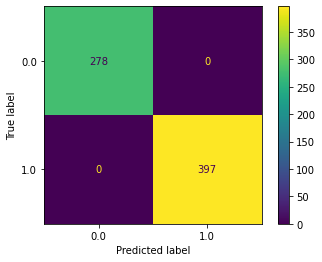

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


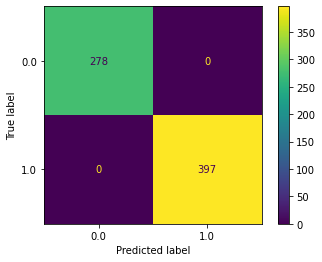

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


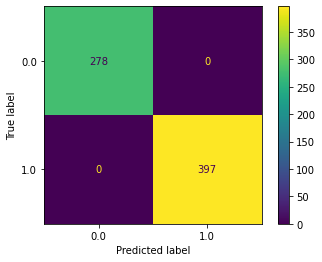

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


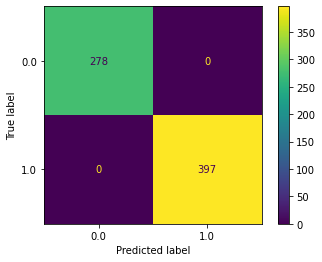

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


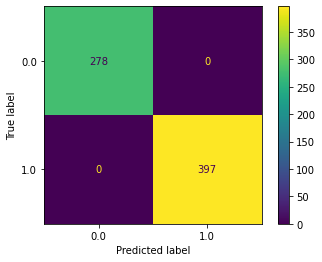

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


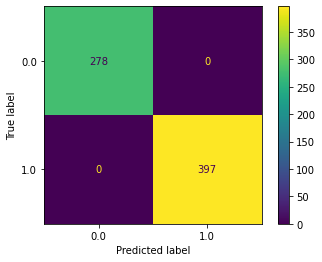

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


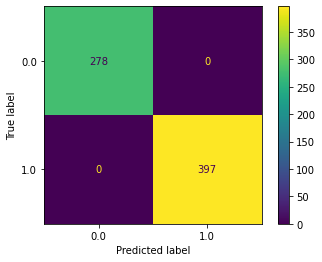

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


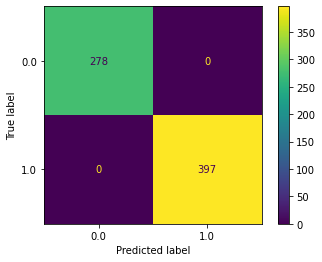

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


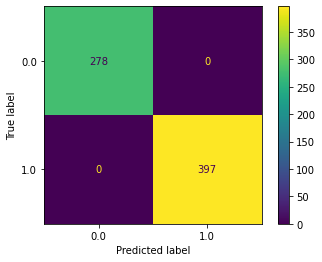

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


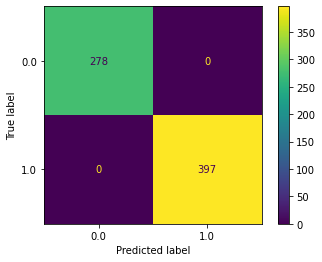

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


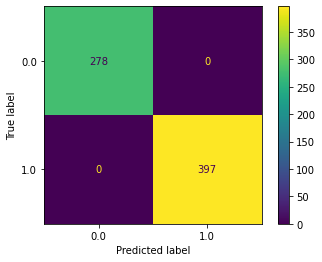

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0
the mean accuracy 1.0
1.0


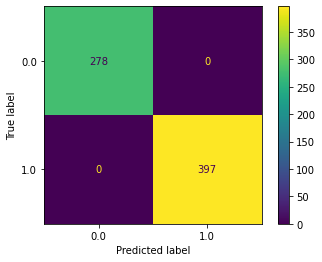

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 1.0


In [230]:
accs = []
f1s = []
recalls = []
precisions = []
aucs = []

for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(poly_test, test_y, ret[i], ret_prob[i], mods[i])
    accs.append(mean_acc)
    f1s.append(f1)
    recalls.append(rec)
    precisions.append(precsson)
    aucs.append(ra_score)

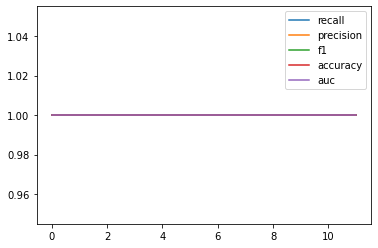

In [231]:
plt.plot(range(12), recalls, label="recall")
plt.plot(range(12), precisions, label="precision")
plt.plot(range(12), f1s, label="f1")
plt.plot(range(12), accs, label="accuracy")
plt.plot(range(12), aucs, label="auc")
plt.legend()
plt.show()

In [91]:
ret = []
ret_prob = []
mods = []
for est in estimt:
    for cri in criterion:
        clf = RandomForestClassifier(n_estimators=est, criterion=cri, random_state=42)
        clf.fit(new_train_x, train_y)
        pred = clf.predict(new_test_x)
        pred_prob = clf.predict_proba(new_test_x)
        ret.append(pred)
        ret_prob.append(pred_prob)
        mods.append(clf)

In [95]:
# def eva(x, y, prd, prd_prob,model):
#     mean_acc = model.score(x, y)
#     print("the mean accuracy", mean_acc)
        
#     f1 = metrics.f1_score(y, prd, pos_label=1)
#     print(f1)
  
#     recall = metrics.recall_score(y, prd, pos_label=1)
#     precision = metrics.precision_score(y, prd)
#     metrics.plot_confusion_matrix(model,x, y)
#     plt.show()

    
#     # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
#     ra_score = metrics.roc_auc_score(y, prd_prob[:,1])
#     print("Area Under the Receiver Operating Characteristic Curve (ROC AUC)", ra_score)

    
#     return mean_acc,f1,  recall, precision, ra_score

the mean accuracy 0.6
0.6361185983827493


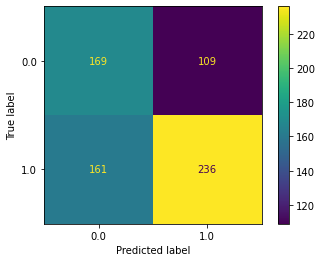

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6566515049924795
the mean accuracy 0.5925925925925926
0.6238030095759234


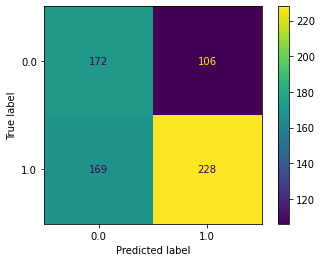

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6391959480274723
the mean accuracy 0.5911111111111111
0.628032345013477


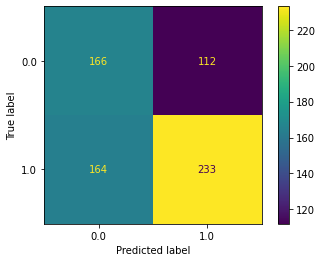

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.647427649819691
the mean accuracy 0.5896296296296296
0.6189821182943603


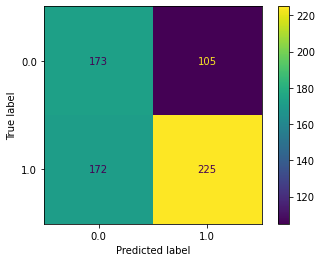

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6562890745338239
the mean accuracy 0.6207407407407407
0.654054054054054


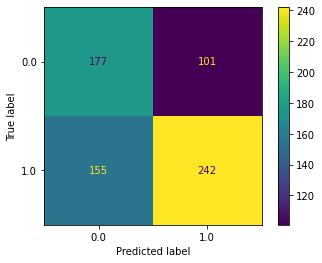

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6629577949730896
the mean accuracy 0.6
0.6229050279329609


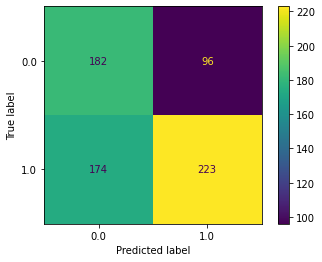

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6595373575195259
the mean accuracy 0.6074074074074074
0.6404341926729986


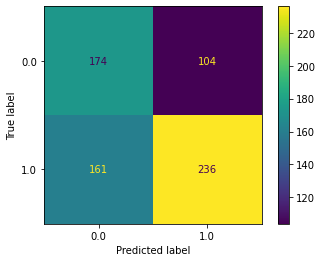

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6606246488954932
the mean accuracy 0.6
0.6229050279329609


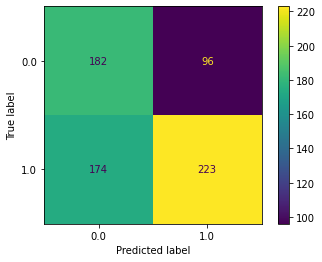

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6569822227860029
the mean accuracy 0.5940740740740741
0.6256830601092895


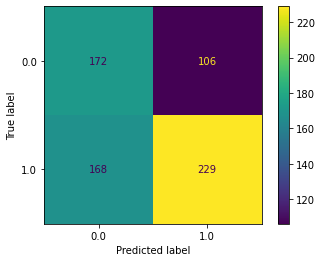

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6536161499012377
the mean accuracy 0.6014814814814815
0.6248256624825662


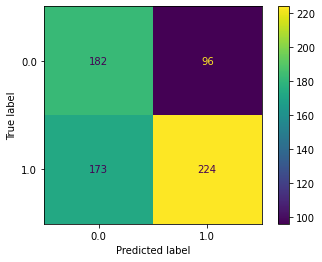

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6554373629559829
the mean accuracy 0.6029629629629629
0.6378378378378378


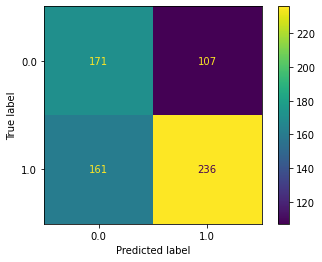

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6520939419748836
the mean accuracy 0.5985185185185186
0.6251728907330566


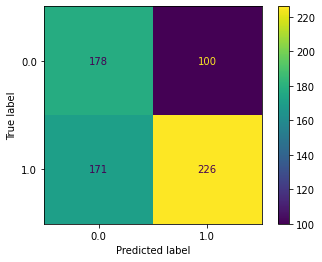

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6564159251943533


In [96]:
accs = []
f1s = []
recalls = []
precisions = []
aucs = []

for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(new_test_x, test_y, ret[i], ret_prob[i], mods[i])
    accs.append(mean_acc)
    f1s.append(f1)
    recalls.append(rec)
    precisions.append(precsson)
    aucs.append(ra_score)

In [101]:
print(len(recalls))

12


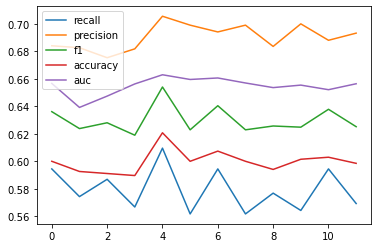

In [107]:
plt.plot(range(12), recalls, label="recall")
plt.plot(range(12), precisions, label="precision")
plt.plot(range(12), f1s, label="f1")
plt.plot(range(12), accs, label="accuracy")
plt.plot(range(12), aucs, label="auc")
plt.legend()
plt.show()

In [110]:
solvers = ['lbfgs', 'liblinear', 'sag']
Cs = [1.0, 0.75, 0.5, 0.25, 0.05]

In [245]:
rets = []
ret_probs = []
ret_log_probas = []
modss = []

for sol in solvers:
    for c in Cs:
        clf = LogisticRegression(solver=sol, C=c, random_state=0)
        clf.fit(poly_train, train_y)
        pred = clf.predict(poly_test)
        pred_prob = clf.predict_proba(poly_test)
        pred_log_proba = clf.predict_log_proba(poly_test)
        
        
        rets.append(pred)
        ret_probs.append(pred_prob)
        ret_log_probas.append(pred_log_proba)
        modss.append(clf)

C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib

the mean accuracy 0.48592592592592593
0.3770197486535009


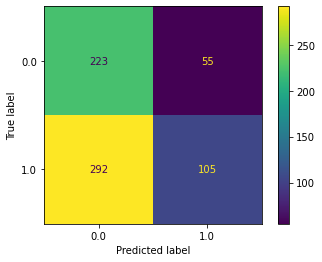

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750502872261385
the mean accuracy 0.48592592592592593
0.3770197486535009


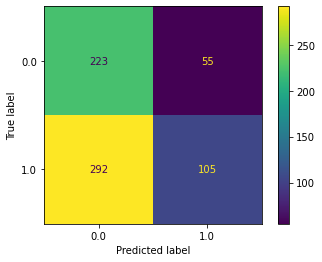

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750502872261385
the mean accuracy 0.48592592592592593
0.3770197486535009


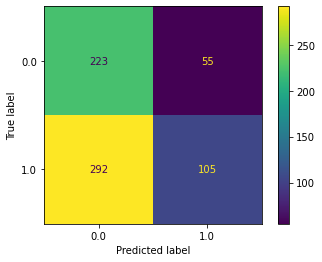

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750502872261385
the mean accuracy 0.48592592592592593
0.3770197486535009


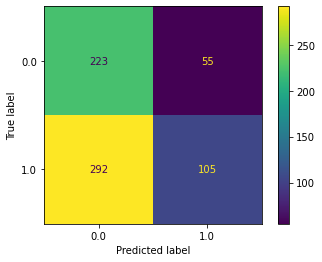

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750502872261385
the mean accuracy 0.48592592592592593
0.3770197486535009


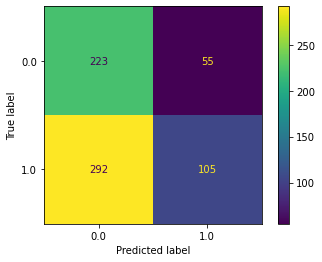

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750502872261385
the mean accuracy 0.5318518518518518
0.4662162162162163


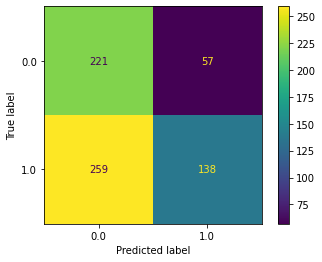

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.603673232698476
the mean accuracy 0.5318518518518518
0.4662162162162163


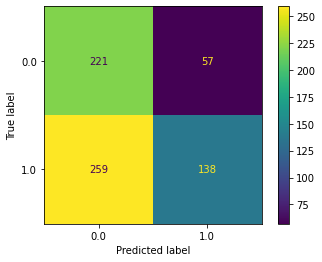

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.603673232698476
the mean accuracy 0.5318518518518518
0.4662162162162163


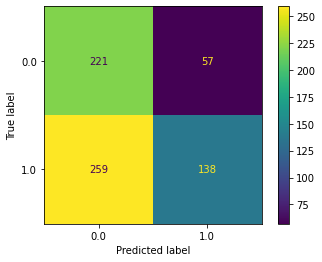

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.603673232698476
the mean accuracy 0.5318518518518518
0.4662162162162163


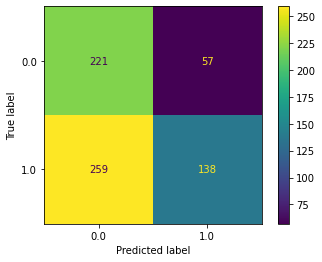

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.603673232698476
the mean accuracy 0.5318518518518518
0.4662162162162163


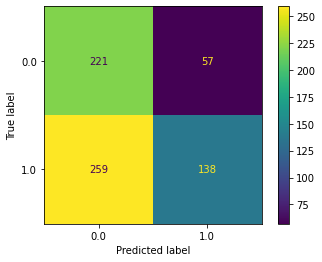

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.603673232698476
the mean accuracy 0.482962962962963
0.3756708407871199


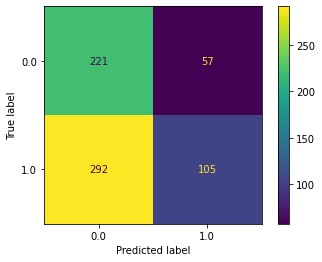

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750140441802729
the mean accuracy 0.482962962962963
0.3756708407871199


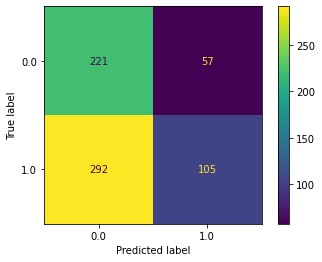

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.5750140441802729


In [246]:
accss = []
f1ss = []
recallss = []
precisionss = []
aucss = []

for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(poly_test, test_y, rets[i], ret_probs[i], modss[i])
    accss.append(mean_acc)
    f1ss.append(f1)
    recallss.append(rec)
    precisionss.append(precsson)
    aucss.append(ra_score)

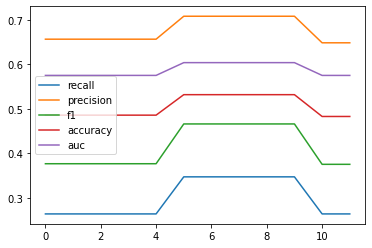

In [247]:
plt.plot(range(12), recallss, label="recall")
plt.plot(range(12), precisionss, label="precision")
plt.plot(range(12), f1ss, label="f1")
plt.plot(range(12), accss, label="accuracy")
plt.plot(range(12), aucss, label="auc")
plt.legend()
plt.show()

In [111]:
rets = []
ret_probs = []
ret_log_probas = []
modss = []

for sol in solvers:
    for c in Cs:
        clf = LogisticRegression(solver=sol, C=c, random_state=0)
        clf.fit(new_train_x, train_y)
        pred = clf.predict(new_test_x)
        pred_prob = clf.predict_proba(new_test_x)
        pred_log_proba = clf.predict_log_proba(new_test_x)
        
        
        rets.append(pred)
        ret_probs.append(pred_prob)
        ret_log_probas.append(pred_log_proba)
        modss.append(clf)

the mean accuracy 0.5911111111111111
0.6219178082191781


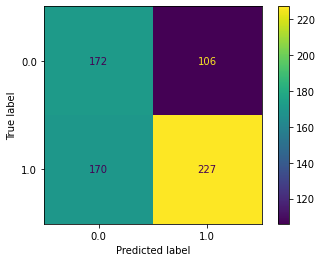

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6463403584437235
the mean accuracy 0.5925925925925926
0.6238030095759234


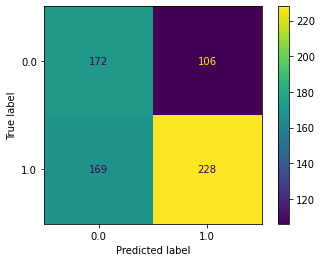

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.64634941920519
the mean accuracy 0.5925925925925926
0.6238030095759234


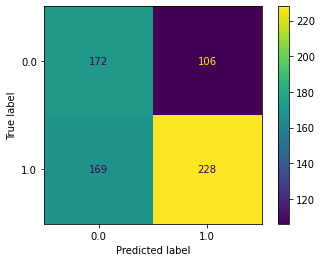

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6465306344345179
the mean accuracy 0.5925925925925926
0.6238030095759234


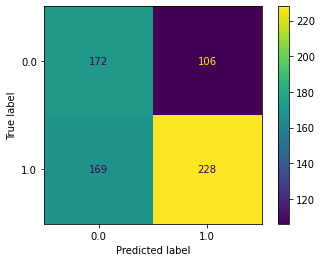

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6466846673794465
the mean accuracy 0.5911111111111111
0.6219178082191781


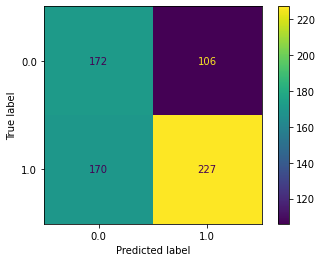

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6478897486544769
the mean accuracy 0.5911111111111111
0.6219178082191781


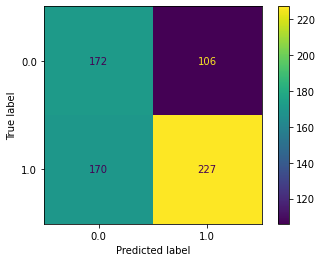

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.64634941920519
the mean accuracy 0.5925925925925926
0.6238030095759234


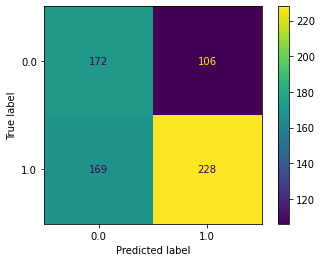

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6463403584437235
the mean accuracy 0.5925925925925926
0.6238030095759234


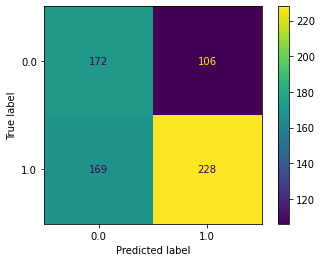

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.646557816718917
the mean accuracy 0.5925925925925926
0.6238030095759234


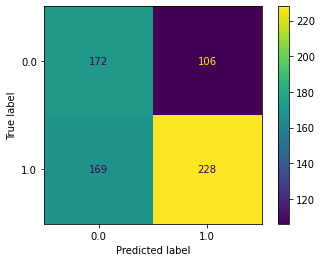

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6466756066179802
the mean accuracy 0.5896296296296296
0.6200274348422495


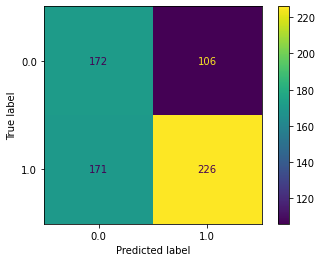

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6479622347462081
the mean accuracy 0.5911111111111111
0.6219178082191781


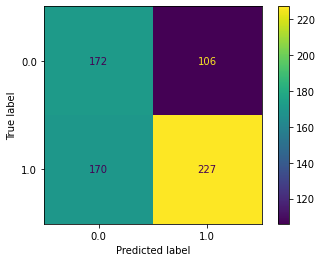

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6463403584437235
the mean accuracy 0.5925925925925926
0.6238030095759234


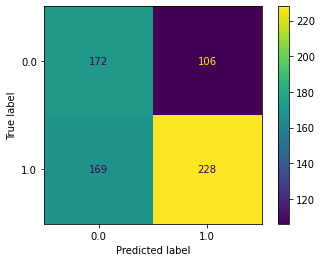

Area Under the Receiver Operating Characteristic Curve (ROC AUC) 0.6463584799666564


In [112]:
accss = []
f1ss = []
recallss = []
precisionss = []
aucss = []

for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(new_test_x, test_y, rets[i], ret_probs[i], modss[i])
    accss.append(mean_acc)
    f1ss.append(f1)
    recallss.append(rec)
    precisionss.append(precsson)
    aucss.append(ra_score)

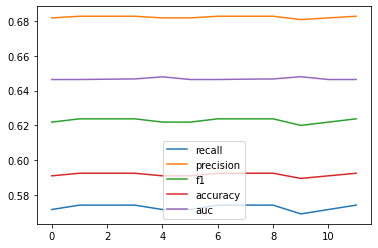

In [113]:
plt.plot(range(12), recallss, label="recall")
plt.plot(range(12), precisionss, label="precision")
plt.plot(range(12), f1ss, label="f1")
plt.plot(range(12), accss, label="accuracy")
plt.plot(range(12), aucss, label="auc")
plt.legend()
plt.show()

In [117]:
np.shape(np.array(new_train_x))

(3172, 16)

In [167]:
x_train = new_train_x.reshape(-1,1,16)     # 1 is the batch
y = to_categorical(train_y, num_classes=2)
print(x_train.shape)

(3172, 1, 16)


In [168]:
np.shape(new_test_x)

(675, 16)

In [169]:
x_test = new_test_x.reshape(-1,1,16)     # 1 is the batch
y_test = to_categorical(test_y, num_classes=2)
print(x_test.shape)

(675, 1, 16)


In [184]:
print(tf.__version__)

2.4.1


In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# from tensorflow.keras.layers import Layer, InputSpec
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import models

In [222]:
def keras_train(batch_size=32, epochs=2):
    model = keras.Sequential(
        [
            keras.Input(shape=(x_train.shape[-1],)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(2, activation="softmax")
        ]
    )

    model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    start_time = time.time()
    model.fit(x_train, y, batch_size=batch_size, epochs=10, validation_split=0.1)
    end_time = time.time()

    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Training Time:", end_time - start_time)

keras_train()

In [223]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [220]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_test_x)
y_kmeans = kmeans.predict(new_test_x)

In [221]:
metrics.accuracy_score(test_y, y_kmeans)

0.4651851851851852

In [202]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_train_x)
y_kmeans = kmeans.predict(new_train_x)
y_kmeans

array([0, 1, 1, ..., 1, 1, 1])

In [232]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(poly_train)
y_kmeans = kmeans.predict(poly_train)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [233]:
metrics.accuracy_score(train_y, y_kmeans)

0.5006305170239597

[[1.00000000e+00 1.27525253e-01 1.05904672e+02 ... 1.72402732e-02
  7.43978572e-02 6.94381313e+00]
 [1.00000000e+00 0.00000000e+00 5.39500000e+02 ... 2.33272204e-04
  1.76212108e-02 6.25000000e+00]]


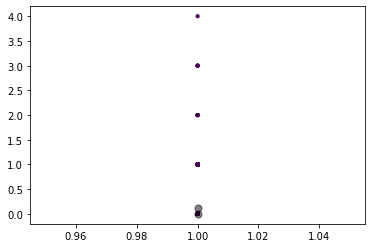

In [234]:
plt.scatter(poly_train[:, 0], poly_train[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);#alpha是灰度颜色

In [236]:
# from sklearn.metrics import confusion_matrix
# mat = confusion_matrix(train_y, y_kmeans)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=qt_data.buggy,
#             yticklabels=qt_data.buggy)
# plt.xlabel('true label')
# plt.ylabel('predicted label')

[[-2.30576759e-02 -6.66505554e-02  9.52898331e-01 -2.61575878e+00
  -1.90320152e-01  4.67568597e-01  2.39788661e+00 -2.54267412e-02
  -1.45023568e-01 -6.81989303e-01  4.01311434e-02  2.28471289e-01
   2.24794233e-01  2.49999677e-01 -8.04914169e-03  1.02596681e-02]
 [ 1.36267400e-03  3.93894768e-03 -5.63148596e-02  1.54587414e-01
   1.12476351e-02 -2.76326016e-02 -1.41711496e-01  1.50268220e-03
   8.57067498e-03  4.03045431e-02 -2.37169028e-03 -1.35023099e-02
  -1.32850014e-02 -1.47746053e-02  4.75692180e-04 -6.06330969e-04]]


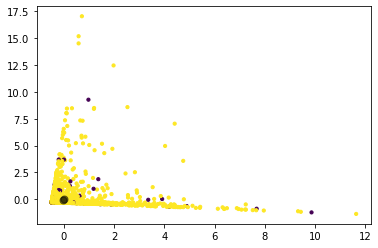

In [203]:
plt.scatter(new_train_x[:, 0], new_train_x[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);#alpha是灰度颜色

[[-2.30576759e-02 -6.66505554e-02  9.52898331e-01 -2.61575878e+00
  -1.90320152e-01  4.67568597e-01  2.39788661e+00 -2.54267412e-02
  -1.45023568e-01 -6.81989303e-01  4.01311434e-02  2.28471289e-01
   2.24794233e-01  2.49999677e-01 -8.04914169e-03  1.02596681e-02]
 [ 1.36267400e-03  3.93894768e-03 -5.63148596e-02  1.54587414e-01
   1.12476351e-02 -2.76326016e-02 -1.41711496e-01  1.50268220e-03
   8.57067498e-03  4.03045431e-02 -2.37169028e-03 -1.35023099e-02
  -1.32850014e-02 -1.47746053e-02  4.75692180e-04 -6.06330969e-04]]


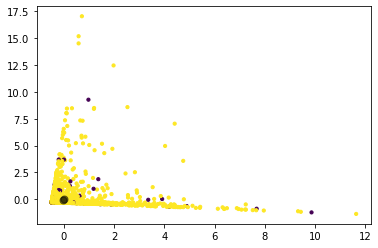

In [204]:
plt.scatter(new_train_x[:, 0], new_train_x[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);#alpha是灰度颜色

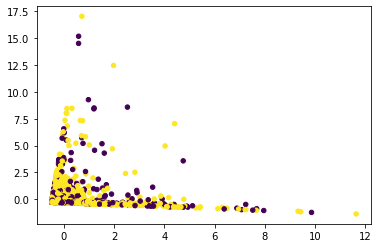

In [205]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)             #产生随机数，rseed是2，所以每次结果一致
    i = rng.permutation(X.shape[0])[:n_clusters]   #打乱数据,X.shape[0]只输出行数，然后取打乱后数据前4个
    centers = X[i]  
#     print(X[0], '\n')
#     print(X[1], '\n')
#     j = 0
    while True:
        # 2a. Assign labels based on closest center
        #labels 是一个1*300的数组，由0,1,2,3组成，即对每一个X中的点分一个cluster（4个cluster中的一个）
        labels = pairwise_distances_argmin(X, centers)  

        # 2b. Find new centers from means of points   mean(0)是列的平均值
        #[labels == i]是array的broadcasting，labels是1*300， i是1*1，然后i扩展成1*300值都是i的数组,
        #[labels == i]这个数组中的true显示哪些点分给了i类
        #X[labels == i] 只打印对应位置为True的1*2 array，个1*2的array共True的个数个
        #X[labels == i].mean(0)则是对X中的True的个数个1*2的array求列的平均值，结果是一个1*2的array
        #new_centers = np.array[X[labels == i].mean(0)]:若i一共4个值的话，new_centers就是一个有4个1*2的array
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
#         if j < 2:
#             print([labels == 0], '\n')
#             print(X[[0,2]], '\n')
#             print(X[labels == 0], '\n')
#         j = j + 1
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(new_train_x, 2)
plt.scatter(new_train_x[:, 0], new_train_x[:, 1], c=labels,
            s=20, cmap='viridis');

In [188]:
# class BuggyEnv(gym.Env):
#     def __init__(self, images_per_episode=1, dataset=(x_train, y), random=True):
#         super().__init__()

#         self.action_space = gym.spaces.Discrete(2)
#         self.observation_space = gym.spaces.Box(low=0, high=1,
#                                                 shape=(16, 1),
#                                                 dtype=np.float32)

#         self.images_per_episode = images_per_episode
#         self.step_count = 0

#         self.x, self.y = dataset
#         self.random = random
#         self.dataset_idx = 0

#     def step(self, action):
#         done = False
#         reward = int(action == self.expected_action)

#         obs = self._next_obs()

#         self.step_count += 1
#         if self.step_count >= self.images_per_episode:
#             done = True

#         return obs, reward, done, {}

#     def reset(self):
#         self.step_count = 0

#         obs = self._next_obs()
#         return obs

#     def _next_obs(self):
#         if self.random:
#             next_obs_idx = random.randint(0, len(self.x) - 1)
#             self.expected_action = int(self.y[next_obs_idx])
#             obs = self.x[next_obs_idx]

#         else:
#             obs = self.x[self.dataset_idx]
#             self.expected_action = int(self.y[self.dataset_idx])

#             self.dataset_idx += 1
#             if self.dataset_idx >= len(self.x):
#                 raise StopIteration()

#         return obs

In [194]:
from DeepQ import Agent

In [195]:
# def mnist_dqn():
# #     logger.configure(dir='./logs/mnist_dqn', format_strs=['stdout', 'tensorboard'])
#     env = BuggyEnv(images_per_episode=1)
# #     env = bench.Monitor(env, logger.get_dir())

#     model = Agent.learn(
#         env,
#         "mlp",
#         num_layers=1,
#         num_hidden=64,
#         activation=tf.nn.relu,
#         hiddens=[32],
#         dueling=True,
#         lr=1e-4,
#         total_timesteps=int(1.2e5),
#         buffer_size=10000,
#         exploration_fraction=0.1,
#         exploration_final_eps=0.01,
#         train_freq=4,
#         learning_starts=10000,
#         target_network_update_freq=1000,
#     )

#     model.save('dqn_mnist.pkl')
#     env.close()

#     return model

# start_time = time.time()
# dqn_model = mnist_dqn()
# print("DQN Training Time:", time.time() - start_time)

TypeError: learn() got an unexpected keyword argument 'num_layers'

In [196]:
# def mnist_dqn_eval(dqn_model):
#     attempts, correct = 0,0

#     env = BuggyEnv(images_per_episode=1, dataset=(x_test, y_test), random=False)

#     try:
#         while True:
#             obs, done = env.reset(), False
#             while not done:
#                 obs, rew, done, _ = env.step(dqn_model(obs[None])[0])

#                 attempts += 1
#                 if rew > 0:
#                     correct += 1

#     except StopIteration:
#         print()
#         print('validation done...')
#         print('Accuracy: {0}%'.format((float(correct) / attempts) * 100))

# mnist_dqn_eval(dqn_model)

NameError: name 'dqn_model' is not defined